<a href="https://colab.research.google.com/github/Vijaybabu-937/MachineLearningProjects/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Basic and most important libraries
#House_Price prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [70]:
data=pd.read_csv("/content/sample_data/housing.csv")

In [71]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [72]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [73]:
data.shape

(20640, 10)

In [74]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [76]:
data.dropna(inplace=True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [78]:
correlation_mat=data.corr()

<Axes: >

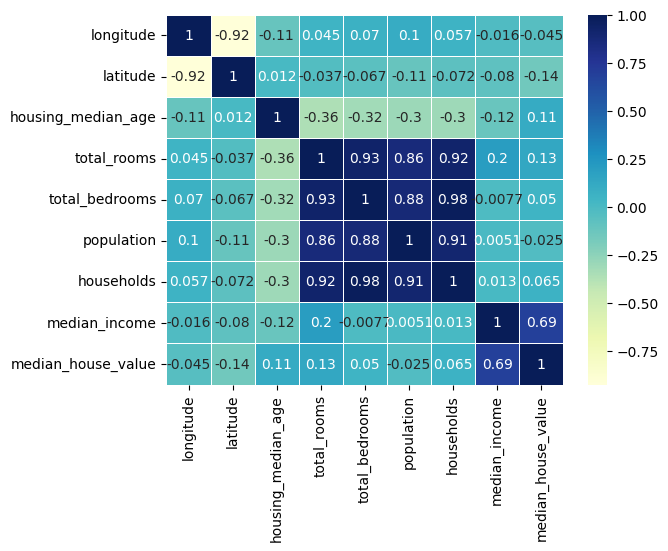

In [79]:
sns.heatmap(correlation_mat,annot=True, linewidth=.5,cmap="YlGnBu")

In [80]:
from sklearn.model_selection import train_test_split

X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [82]:
train_data=X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1952,-120.81,38.73,38,2005,385.0,882,353,2.5104,INLAND,120500
4286,-118.32,34.10,52,786,270.0,756,273,2.2311,<1H OCEAN,206300
969,-121.89,37.67,20,2948,471.0,1181,474,6.0604,INLAND,247900
2143,-119.74,36.78,27,4049,947.0,2254,882,2.2467,INLAND,70700
14782,-117.09,32.57,17,444,83.0,357,87,5.1478,NEAR OCEAN,138900
...,...,...,...,...,...,...,...,...,...,...
9237,-120.02,36.95,25,2115,482.0,1976,474,1.8431,INLAND,53900
13911,-116.22,34.21,23,1175,468.0,355,151,2.2083,INLAND,42500
11581,-118.03,33.77,24,3810,579.0,1818,590,5.8053,<1H OCEAN,255900
16791,-122.45,37.67,36,1664,326.0,963,322,4.7813,NEAR OCEAN,246400


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

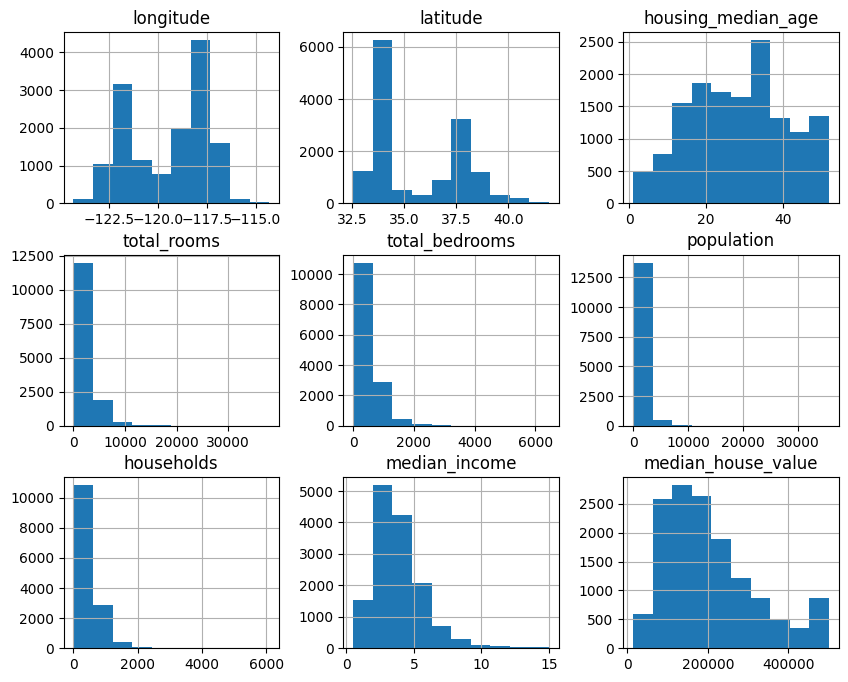

In [83]:
train_data.hist(figsize=(10,8))

<Axes: >

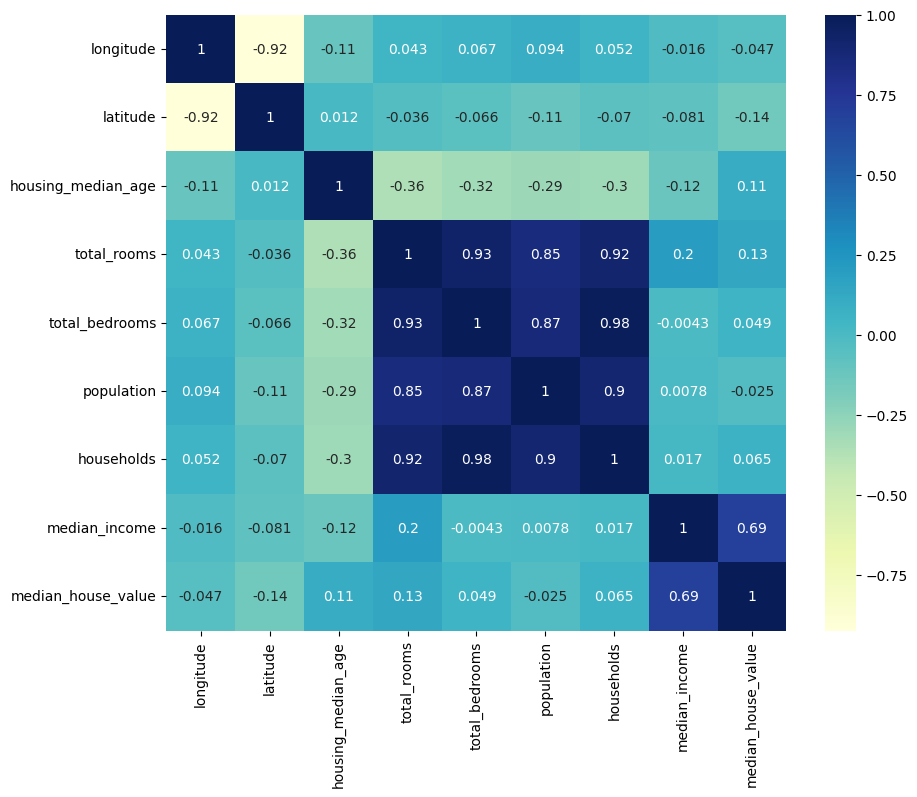

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [85]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1952,-120.81,38.73,38,7.603898,5.955837,6.783325,5.869297,2.5104,INLAND,120500
4286,-118.32,34.10,52,6.668228,5.602119,6.629363,5.613128,2.2311,<1H OCEAN,206300
969,-121.89,37.67,20,7.989221,6.156979,7.074963,6.163315,6.0604,INLAND,247900
2143,-119.74,36.78,27,8.306472,6.854355,7.720905,6.783325,2.2467,INLAND,70700
14782,-117.09,32.57,17,6.098074,4.430817,5.880533,4.477337,5.1478,NEAR OCEAN,138900
...,...,...,...,...,...,...,...,...,...,...
9237,-120.02,36.95,25,7.657283,6.180017,7.589336,6.163315,1.8431,INLAND,53900
13911,-116.22,34.21,23,7.069874,6.150603,5.874931,5.023881,2.2083,INLAND,42500
11581,-118.03,33.77,24,8.245647,6.363028,7.506042,6.381816,5.8053,<1H OCEAN,255900
16791,-122.45,37.67,36,7.417580,5.789960,6.871091,5.777652,4.7813,NEAR OCEAN,246400


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

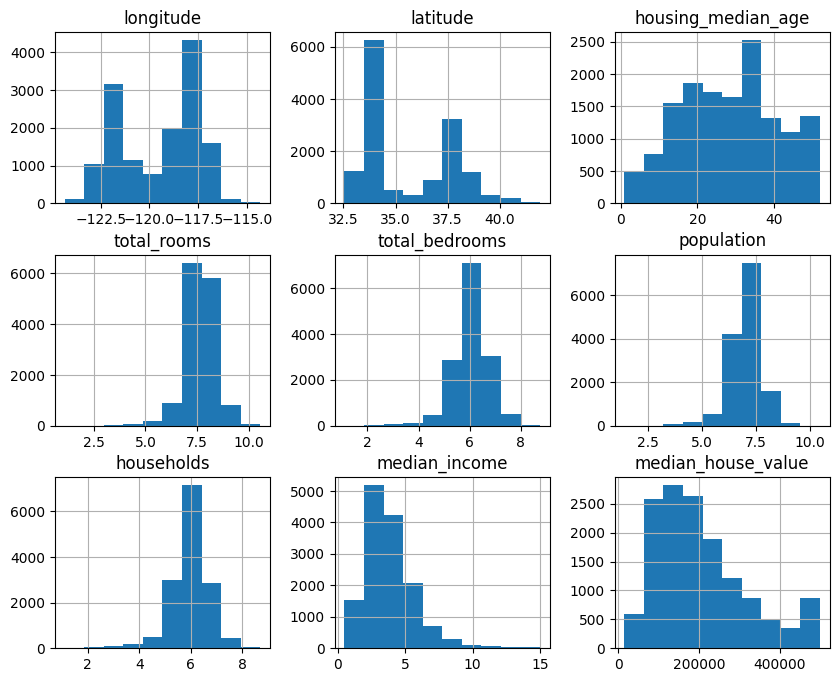

In [86]:
train_data.hist(figsize=(10,8))

In [87]:
train_data.ocean_proximity.value_counts()
pd.get_dummies(train_data.ocean_proximity)
train_data.join(pd.get_dummies(train_data.ocean_proximity))
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

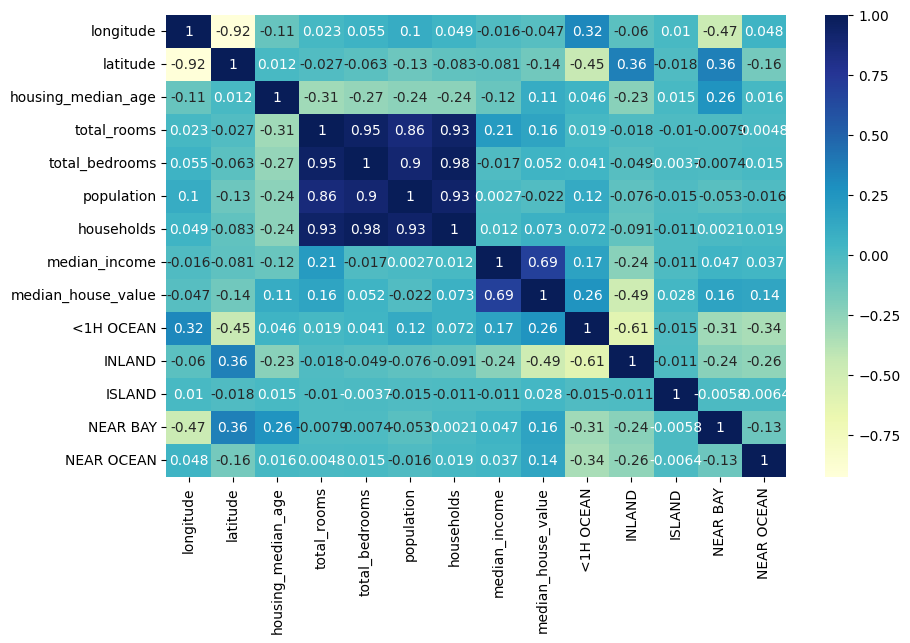

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

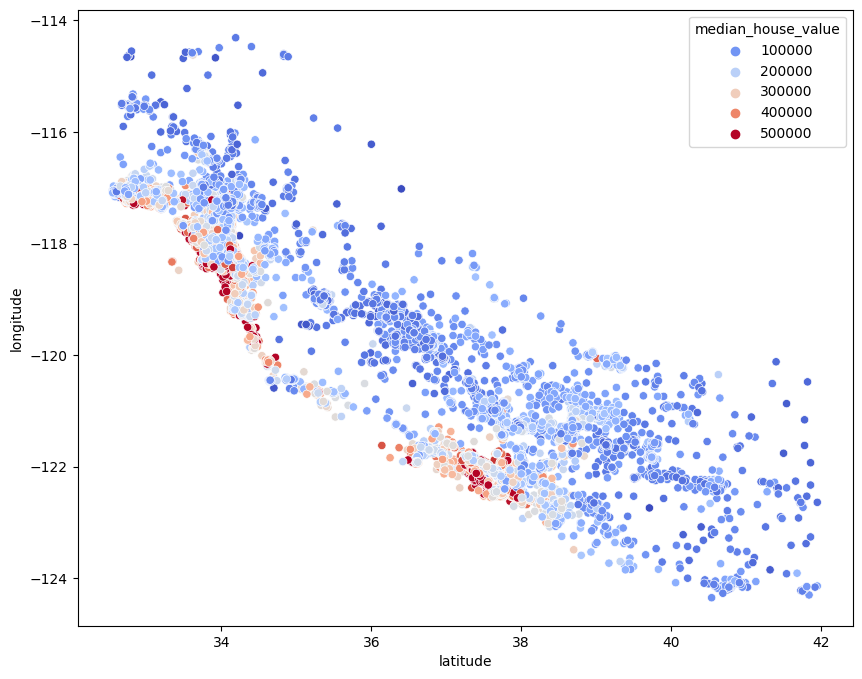

In [89]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [90]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_ratio']=train_data['households']/train_data['total_rooms']

<Axes: >

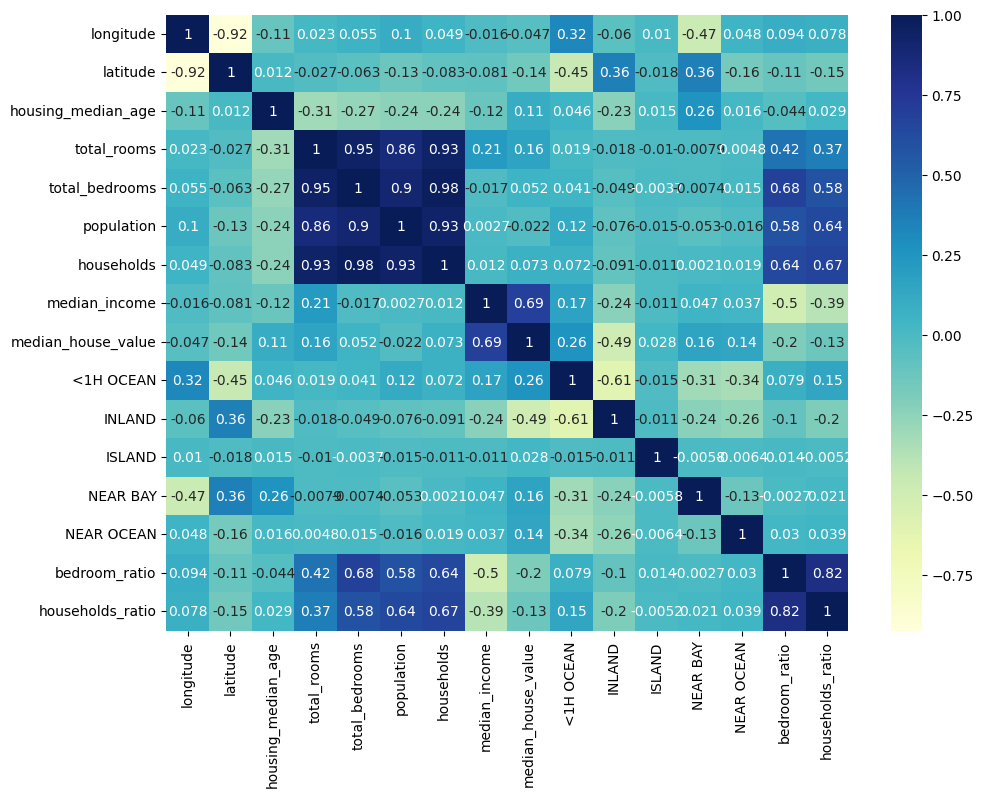

In [91]:
plt.figure(figsize=(11,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

### Linear regression

In [92]:
from sklearn.linear_model import LinearRegression
train_data=train_data.drop(['ISLAND'],axis=1)
X_train, y_train= train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [93]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
1952,-120.81,38.73,38,7.603898,5.955837,6.783325,5.869297,2.5104,120500,0,1,0,0,0.783261,0.771880
4286,-118.32,34.10,52,6.668228,5.602119,6.629363,5.613128,2.2311,206300,1,0,0,0,0.840121,0.841772
969,-121.89,37.67,20,7.989221,6.156979,7.074963,6.163315,6.0604,247900,0,1,0,0,0.770661,0.771454
2143,-119.74,36.78,27,8.306472,6.854355,7.720905,6.783325,2.2467,70700,0,1,0,0,0.825182,0.816631
14782,-117.09,32.57,17,6.098074,4.430817,5.880533,4.477337,5.1478,138900,0,0,0,1,0.726593,0.734221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9237,-120.02,36.95,25,7.657283,6.180017,7.589336,6.163315,1.8431,53900,0,1,0,0,0.807077,0.804896
13911,-116.22,34.21,23,7.069874,6.150603,5.874931,5.023881,2.2083,42500,0,1,0,0,0.869973,0.710604
11581,-118.03,33.77,24,8.245647,6.363028,7.506042,6.381816,5.8053,255900,1,0,0,0,0.771683,0.773962
16791,-122.45,37.67,36,7.417580,5.789960,6.871091,5.777652,4.7813,246400,0,0,0,1,0.780573,0.778913


In [94]:
test_data=X_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1049,-120.62,38.39,15,3750,691.0,1444,603,2.7399,INLAND,134800
14101,-117.10,32.76,31,987,267.0,619,250,2.9286,NEAR OCEAN,151800
11394,-117.96,33.74,19,1783,415.0,1025,383,4.1484,<1H OCEAN,230000
18000,-121.98,37.28,26,1182,309.0,620,306,3.3922,<1H OCEAN,269100
19179,-122.68,38.43,29,488,63.0,161,62,6.0774,<1H OCEAN,334400
...,...,...,...,...,...,...,...,...,...,...
13901,-116.56,34.06,15,6928,1529.0,2568,1075,2.5405,INLAND,69600
16635,-120.84,35.30,15,2062,327.0,781,316,4.9359,NEAR OCEAN,317700
11716,-120.10,39.19,18,3824,559.0,241,106,5.5456,INLAND,360000
8109,-118.19,33.79,29,3497,1096.0,2994,919,1.8109,NEAR OCEAN,137500


In [95]:
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)



In [96]:
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data=test_data.drop(['ISLAND'],axis=1)

In [97]:
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_ratio']=test_data['households']/test_data['total_rooms']

In [98]:
X_test, y_test= test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [99]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
1049,-120.62,38.39,15,8.229778,6.539586,7.275865,6.403574,2.7399,134800,0,1,0,0,0.794625,0.778098
14101,-117.10,32.76,31,6.895683,5.590987,6.429719,5.525453,2.9286,151800,0,0,0,1,0.810795,0.801292
11394,-117.96,33.74,19,7.486613,6.030685,6.933423,5.950643,4.1484,230000,1,0,0,0,0.805529,0.794838
18000,-121.98,37.28,26,7.075809,5.736572,6.431331,5.726848,3.3922,269100,1,0,0,0,0.810730,0.809356
19179,-122.68,38.43,29,6.192362,4.158883,5.087596,4.143135,6.0774,334400,1,0,0,0,0.671615,0.669072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901,-116.56,34.06,15,8.843471,7.333023,7.851272,6.981006,2.5405,69600,0,1,0,0,0.829202,0.789397
16635,-120.84,35.30,15,7.631917,5.793014,6.661855,5.758902,4.9359,317700,0,0,0,1,0.759051,0.754581
11716,-120.10,39.19,18,8.249314,6.327937,5.488938,4.672829,5.5456,360000,0,1,0,0,0.767086,0.566451
8109,-118.19,33.79,29,8.159947,7.000334,8.004700,6.824374,1.8109,137500,0,0,0,1,0.857890,0.836326


In [100]:
reg.score(X_test,y_test)

0.6747012163414619

### random-forest (Extra)

In [101]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
forest.score(X_test,y_test)

0.8149702495689086